# DEMO! - this won't work if the checkpoints are not there!


## Step 1: Setup


In [75]:
import sys
from pathlib import Path
sys.path.insert(0, str(Path().absolute().parent))

import matplotlib.pyplot as plt

# Register HEIF support if available
try:
    from pillow_heif import register_heif_opener
    register_heif_opener()
    heif_supported = True
except ImportError:
    heif_supported = False

# Import utilities and face recognizer
from notebooks.utils import *
from scripts.test_face_recognition import FaceRecognizer

# Setup
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

print("✓ Setup complete!")

✓ Setup complete!


## Step 2: Load Model


In [76]:
# Load the trained model
model_path = "../data/models/checkpoint_facenet_finetuned_final.pth"
recognizer = FaceRecognizer(model_path)
print("✓ Model ready!")


Using device: cuda
Loading FaceNet model (embedding_size=128)...
Loaded model from ../data/models/checkpoint_facenet_finetuned_final.pth
  Model type: facenet
  Embedding size: 128
  Trained for 8 epochs
  Best validation loss: 0.0057
✓ Model ready!


## Step 3: Set Your Image Paths

**Just change these two paths to your images!**


In [77]:
# ============================================
# CHANGE THESE PATHS TO YOUR IMAGES!
# ============================================
image1_path = "photos/me1.jpg"  # First image (reference)
image2_path = "photos/notme2.jpg"  # Second image (to compare)

# Paths can be:
# - Relative to project root: "photos/me1.jpg"
# - Absolute: "/home/user/photos/me1.jpg"
# - From LFW dataset: "data/lfw/lfw-filtered/Person_Name/image.jpg"
# ============================================

print(f"Image 1: {image1_path}")
print(f"Image 2: {image2_path}")


Image 1: photos/me1.jpg
Image 2: photos/notme2.jpg


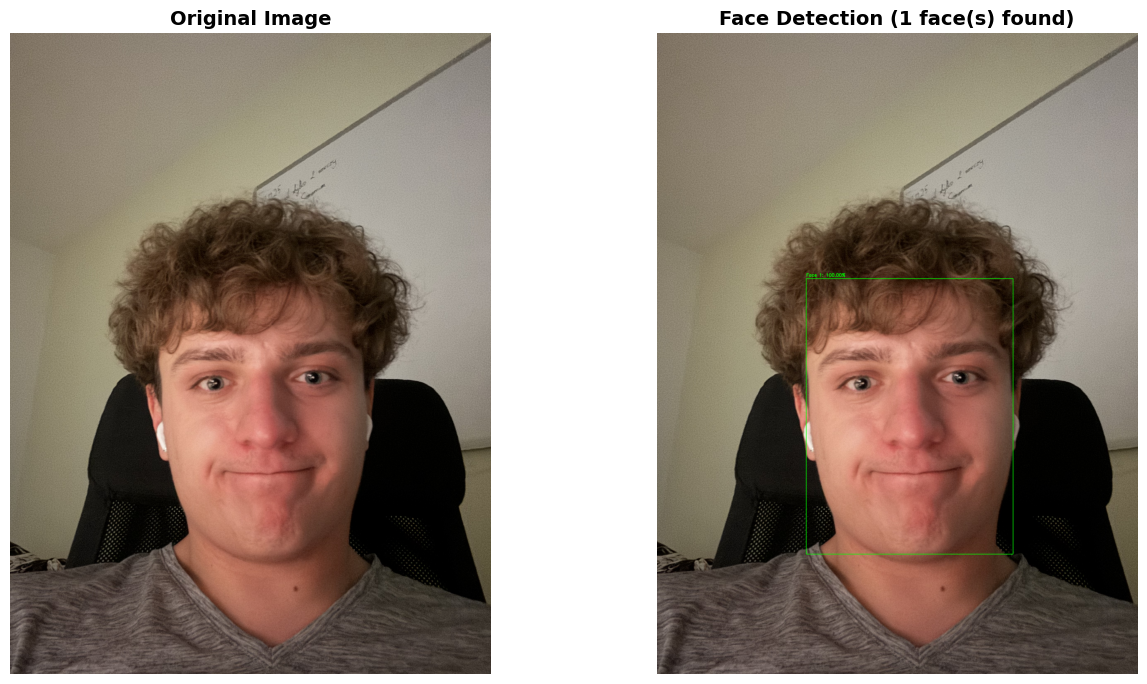

Found 1 face(s)!
  Face 1: Confidence 100.00%, Box: [718, 1183, 996, 1327]


In [78]:
# Load face detector
detector = load_face_detector()

# Load and detect faces in image 1
image1, image1_path_str = load_image(image1_path, heif_supported)
faces1 = detect_faces(image1, detector)

# Visualize
visualize_face_detection(image1, faces1)


## Step 5: Face Detection - Image 2


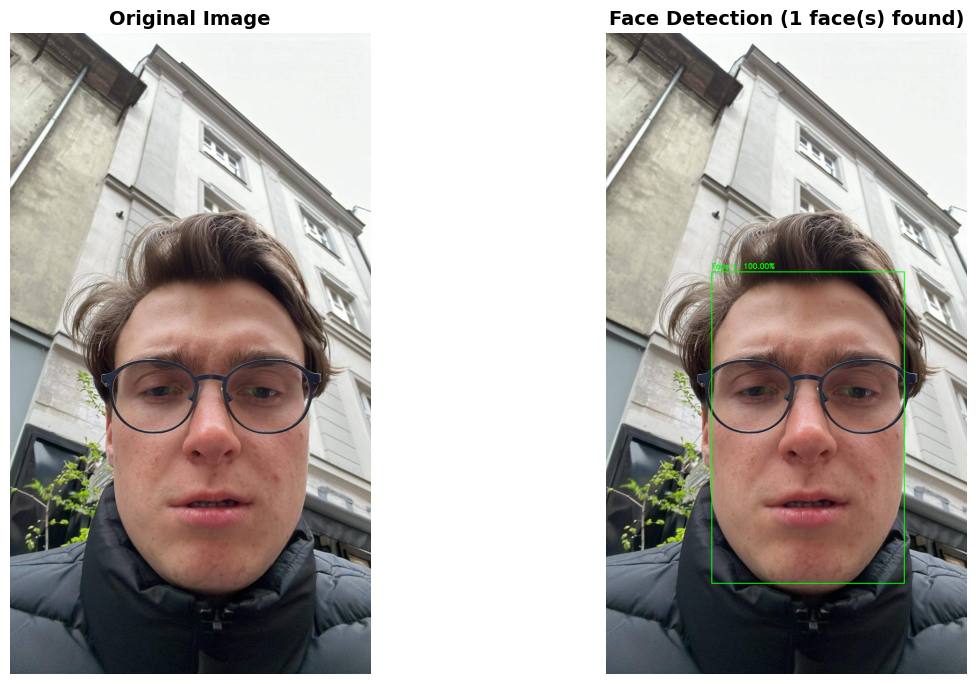

Found 1 face(s)!
  Face 1: Confidence 100.00%, Box: [316, 715, 576, 933]


In [79]:
# Load and detect faces in image 2
image2, image2_path_str = load_image(image2_path, heif_supported)
faces2 = detect_faces(image2, detector)

# Visualize
visualize_face_detection(image2, faces2)


## Step 6: Preprocessing Visualization - Image 1


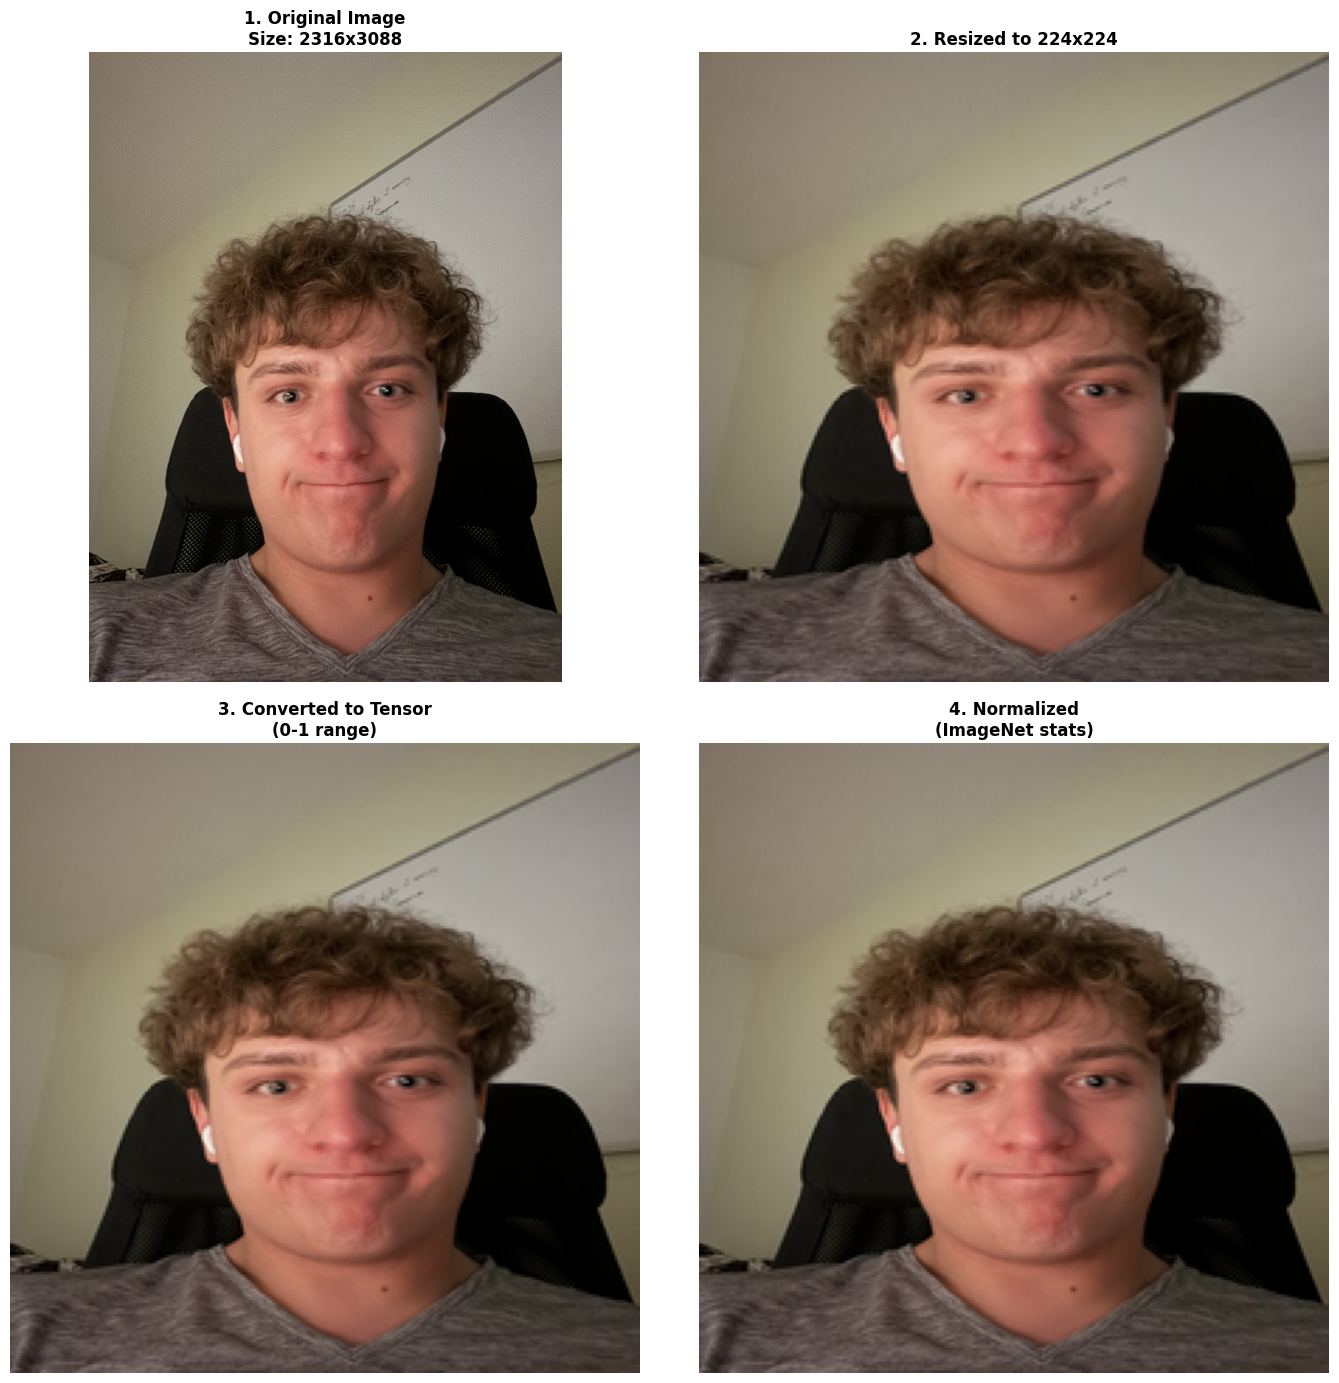


Preprocessing Statistics:
  Original size: (2316, 3088)
  Resized size: (224, 224)
  Tensor shape: torch.Size([3, 224, 224])
  Tensor range: [0.000, 1.000]
  Normalized range: [-2.118, 2.361]


In [80]:
# Show how image 1 is preprocessed
visualize_preprocessing(image1_path)


## Step 7: Extract Face Embeddings


In [81]:
# Get embeddings using the trained model
embedding1 = recognizer.get_embedding(image1_path_str)
embedding2 = recognizer.get_embedding(image2_path_str)

print("✓ Embeddings extracted!")
print(f"  Image 1 embedding shape: {embedding1.shape}")
print(f"  Image 2 embedding shape: {embedding2.shape}")


✓ Embeddings extracted!
  Image 1 embedding shape: torch.Size([1, 128])
  Image 2 embedding shape: torch.Size([1, 128])


## Step 8: Visualize Embeddings


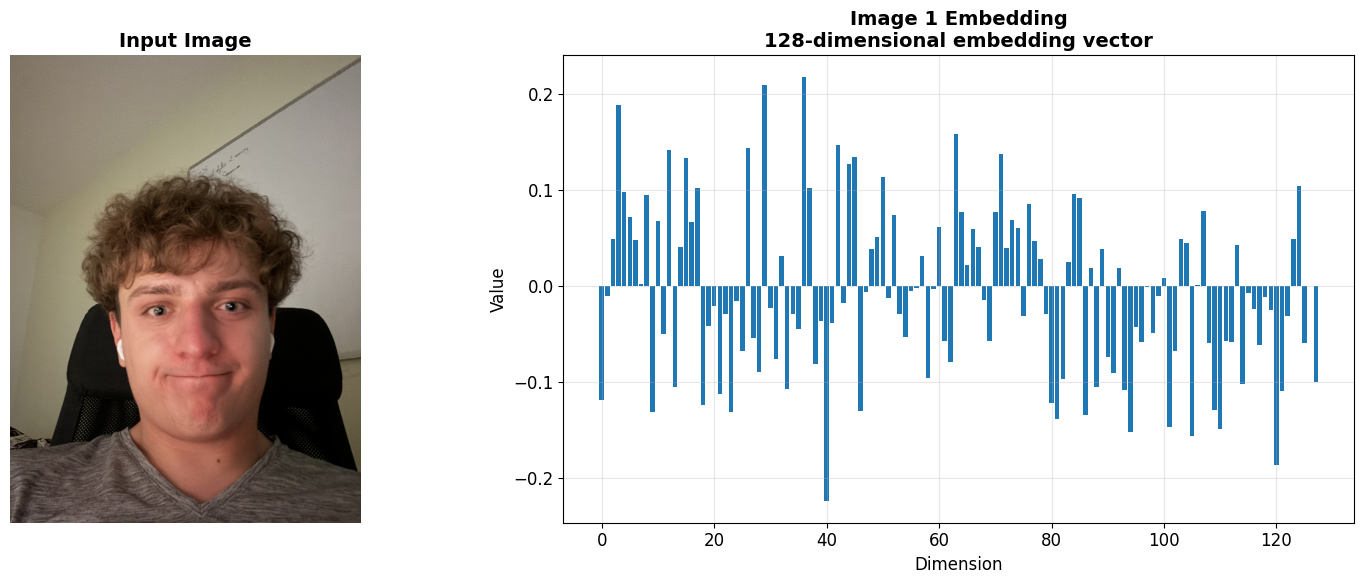


Embedding Statistics:
  Shape: (128,)
  Min: -0.2248
  Max: 0.2184
  Mean: -0.0076
  Std: 0.0881
  Norm (L2): 1.0000 (should be ~1.0)


In [82]:
# Visualize embedding for image 1
visualize_embedding(embedding1, image1_path, "Image 1 Embedding")


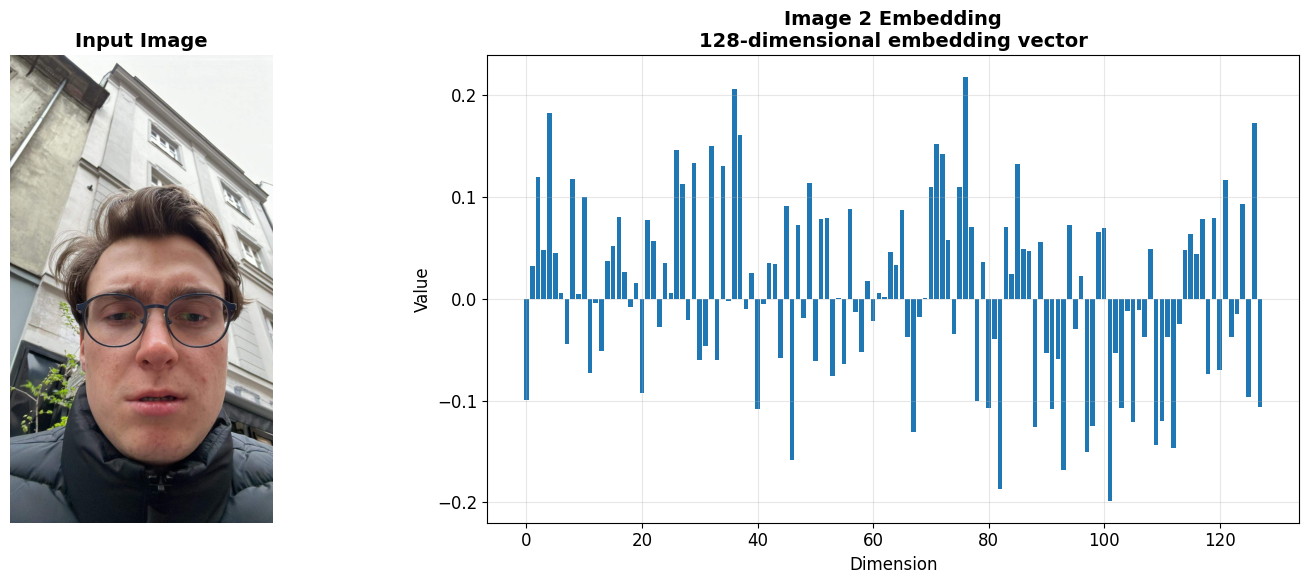


Embedding Statistics:
  Shape: (128,)
  Min: -0.1991
  Max: 0.2180
  Mean: 0.0078
  Std: 0.0880
  Norm (L2): 1.0000 (should be ~1.0)


In [83]:
# Visualize embedding for image 2
visualize_embedding(embedding2, image2_path, "Image 2 Embedding")


## Step 9: Face Recognition - Compare the Two Images!


Adding Reference to database...


Added Reference


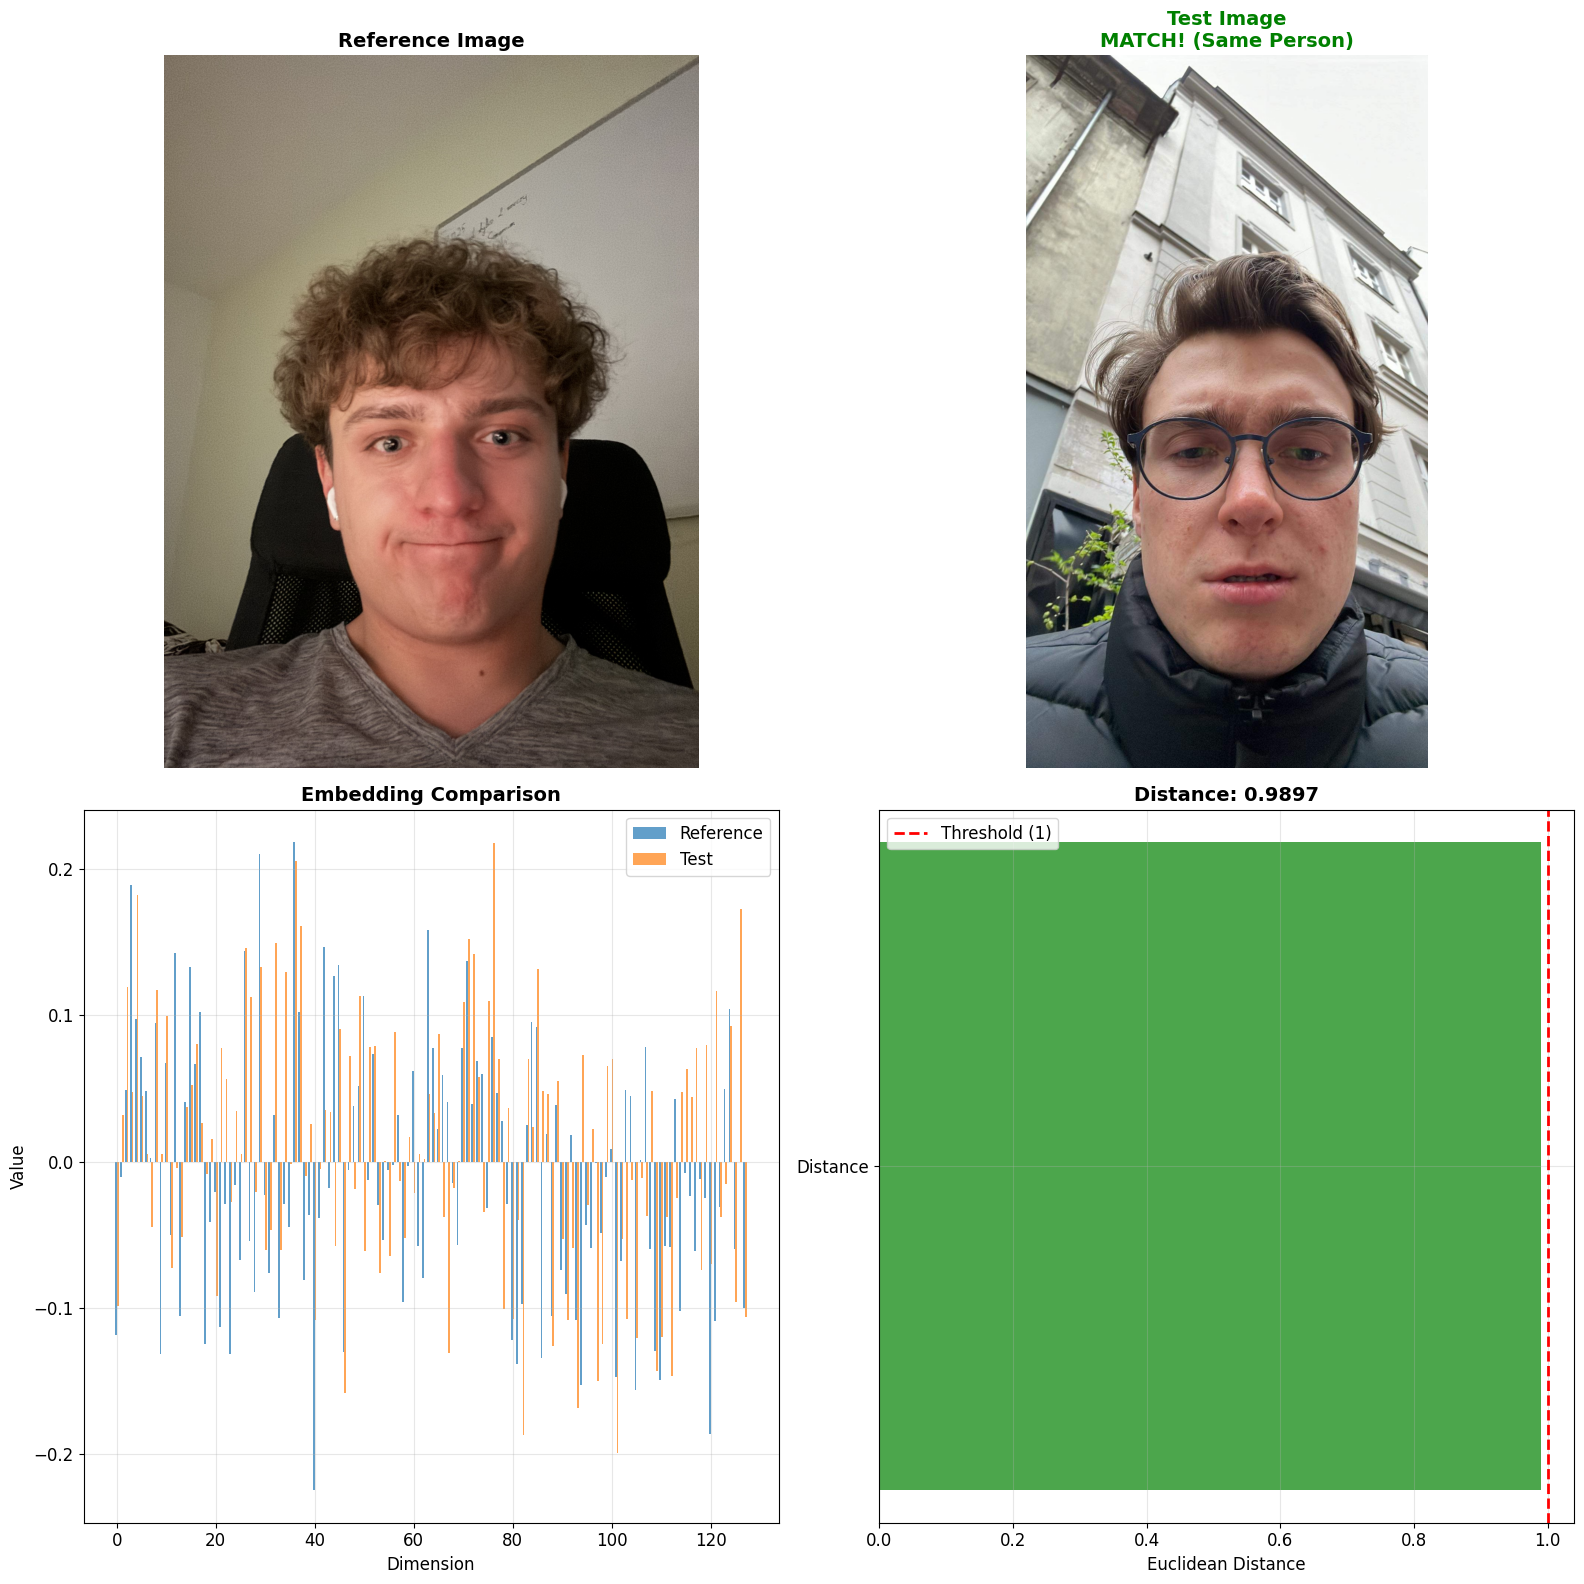


RECOGNITION RESULTS
Distance: 0.9897
Threshold: 1
Confidence: 1.03%

MATCH! Same person detected.


In [84]:
# Add image 1 as reference
recognizer.add_known_face("Reference", image1_path_str)

# Recognize image 2
threshold = 1  # Lower = stricter matching
name, distance, confidence = recognizer.recognize_face(image2_path_str, threshold=threshold)

# Determine if match
is_match = name is not None

# Visualize comparison
visualize_comparison(image1_path, image2_path, embedding1, embedding2, 
                    distance, is_match, threshold, confidence)
